<a href="https://colab.research.google.com/github/max01218/-Pattern-recognition-HW/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [2]:
#輸出2,1且皆為1的tensor
import tensorflow as tf
x = tf.ones(shape=(2, 1))
y = tf.ones(shape=(3,3))
print(y)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [3]:
#內容為0的tensor
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [5]:
#產生隨機內容
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[1.6328313]
 [0.6073916]
 [0.633733 ]], shape=(3, 1), dtype=float32)


In [4]:
#產生內容再0到1之間的隨機不重複tensor
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.19633424]
 [0.1695441 ]
 [0.7596489 ]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [7]:
import numpy as np
x = np.ones(shape=(2, 2))
print(x)
x[0, 0] = 0. #change position 0,0 to be 0
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


**Creating a TensorFlow variable**

In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.5603685],
       [-1.1645347],
       [ 1.7578377]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [11]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[ 3.       ],
       [-1.1645347],
       [ 1.7578377]], dtype=float32)>

**Using `assign_add`**

In [12]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[ 4.        ],
       [-0.16453469],
       [ 2.7578378 ]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [17]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [20]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(input_var)
print(gradient)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [22]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)#梯度計算
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [24]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)#梯度計算出速度與加速度
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [37]:
num_samples_per_class = 500 #tensor 數量
negative_samples = np.random.multivariate_normal(
    mean=[10, 13],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
# print(negative_samples)
# print(positive_samples)

**Stacking the two classes into an array with shape (2000, 2)**

In [38]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)#將兩個tensor堆疊起來
print(inputs)

[[ 9.350069  11.441427 ]
 [11.439518  15.085548 ]
 [10.982781  13.427576 ]
 ...
 [ 2.124296  -0.5835792]
 [ 3.2559798 -0.7905771]
 [ 4.3349895  0.8024995]]


**Generating the corresponding targets (0 and 1)**

In [39]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

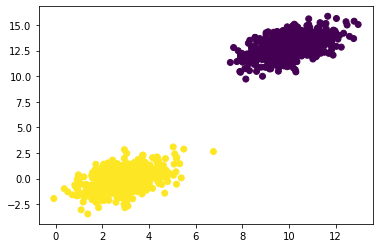

In [40]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [34]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [41]:
def model(inputs):#
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [42]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [43]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [45]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: nan
Loss at step 1: nan
Loss at step 2: nan
Loss at step 3: nan
Loss at step 4: nan
Loss at step 5: nan
Loss at step 6: nan
Loss at step 7: nan
Loss at step 8: nan
Loss at step 9: nan
Loss at step 10: nan
Loss at step 11: nan
Loss at step 12: nan
Loss at step 13: nan
Loss at step 14: nan
Loss at step 15: nan
Loss at step 16: nan
Loss at step 17: nan
Loss at step 18: nan
Loss at step 19: nan
Loss at step 20: nan
Loss at step 21: nan
Loss at step 22: nan
Loss at step 23: nan
Loss at step 24: nan
Loss at step 25: nan
Loss at step 26: nan
Loss at step 27: nan
Loss at step 28: nan
Loss at step 29: nan
Loss at step 30: nan
Loss at step 31: nan
Loss at step 32: nan
Loss at step 33: nan
Loss at step 34: nan
Loss at step 35: nan
Loss at step 36: nan
Loss at step 37: nan
Loss at step 38: nan
Loss at step 39: nan


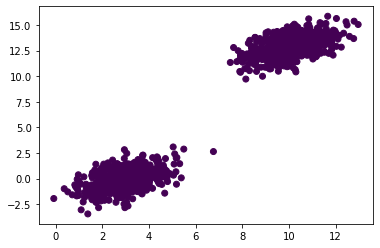

In [46]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

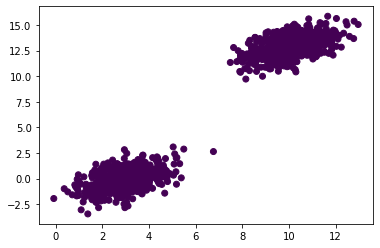

In [47]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [48]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [49]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [50]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [51]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [52]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [53]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [54]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [55]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
8/8 [==============================] - 0s 2ms/step - loss: 290.0823 - binary_accuracy: 0.5160
Epoch 2/5
8/8 [==============================] - 0s 2ms/step - loss: 283.4394 - binary_accuracy: 0.5160
Epoch 3/5
8/8 [==============================] - 0s 3ms/step - loss: 278.2878 - binary_accuracy: 0.5170
Epoch 4/5
8/8 [==============================] - 0s 3ms/step - loss: 273.5374 - binary_accuracy: 0.5170
Epoch 5/5
8/8 [==============================] - 0s 3ms/step - loss: 268.9273 - binary_accuracy: 0.5170


In [56]:
history.history

{'loss': [290.0823059082031,
  283.43939208984375,
  278.2878112792969,
  273.53741455078125,
  268.92730712890625],
 'binary_accuracy': [0.515999972820282,
  0.515999972820282,
  0.5170000195503235,
  0.5170000195503235,
  0.5170000195503235]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [57]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
44/44 [==============================] - 1s 11ms/step - loss: 0.9689 - binary_accuracy: 0.8143 - val_loss: 1.4589 - val_binary_accuracy: 0.8700
Epoch 2/5
44/44 [==============================] - 0s 3ms/step - loss: 0.8373 - binary_accuracy: 0.7800 - val_loss: 0.0300 - val_binary_accuracy: 1.0000
Epoch 3/5
44/44 [==============================] - 0s 2ms/step - loss: 0.8060 - binary_accuracy: 0.8486 - val_loss: 0.0502 - val_binary_accuracy: 0.9833
Epoch 4/5
44/44 [==============================] - 0s 2ms/step - loss: 0.6161 - binary_accuracy: 0.8500 - val_loss: 0.1202 - val_binary_accuracy: 0.7933
Epoch 5/5
44/44 [==============================] - 0s 4ms/step - loss: 0.7655 - binary_accuracy: 0.8243 - val_loss: 3.2780 - val_binary_accuracy: 0.5233


### Inference: Using a model after training

In [58]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[2.5934906]
 [2.7931712]
 [1.3700879]
 [2.7399607]
 [1.639871 ]
 [1.2373881]
 [1.3591945]
 [1.0851927]
 [1.3290248]
 [1.292391 ]]


## Summary